In [1]:
import numpy as np
import matplotlib.pylab as plt
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity

In [15]:
%matplotlib notebook

In [23]:
L = AssignQuantity(50,'micrometer')
x = np.linspace(-L,L,1000)
x_mag = x.magnitude

<IPython.core.display.Javascript object>


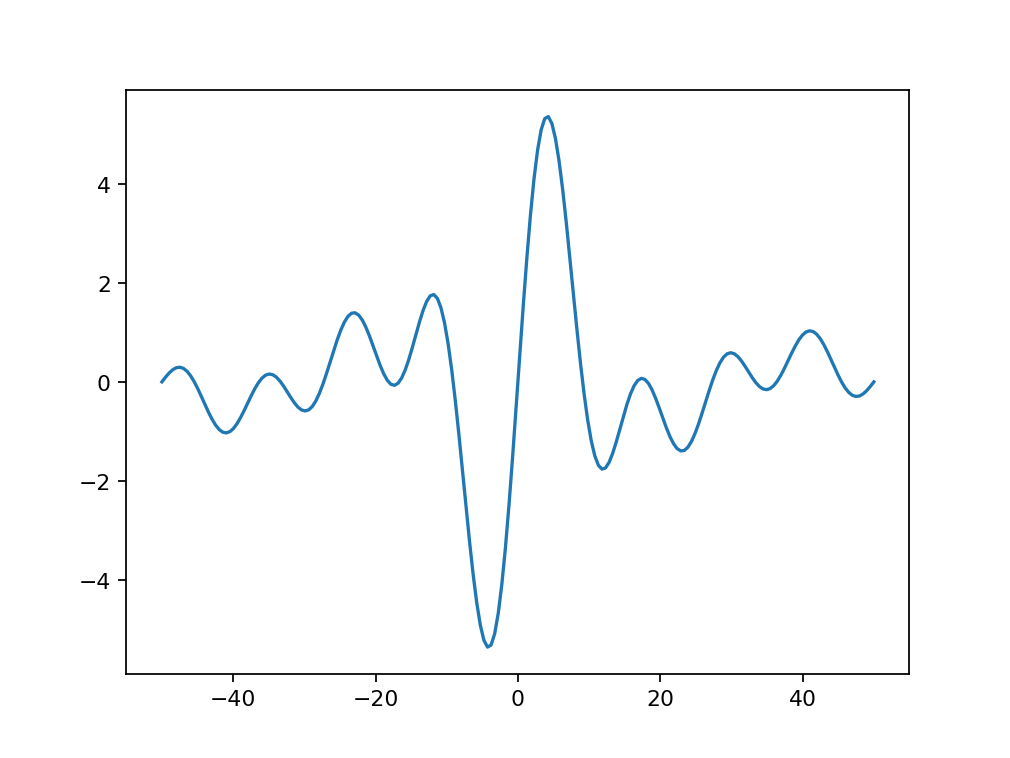

<IPython.core.display.Javascript object>


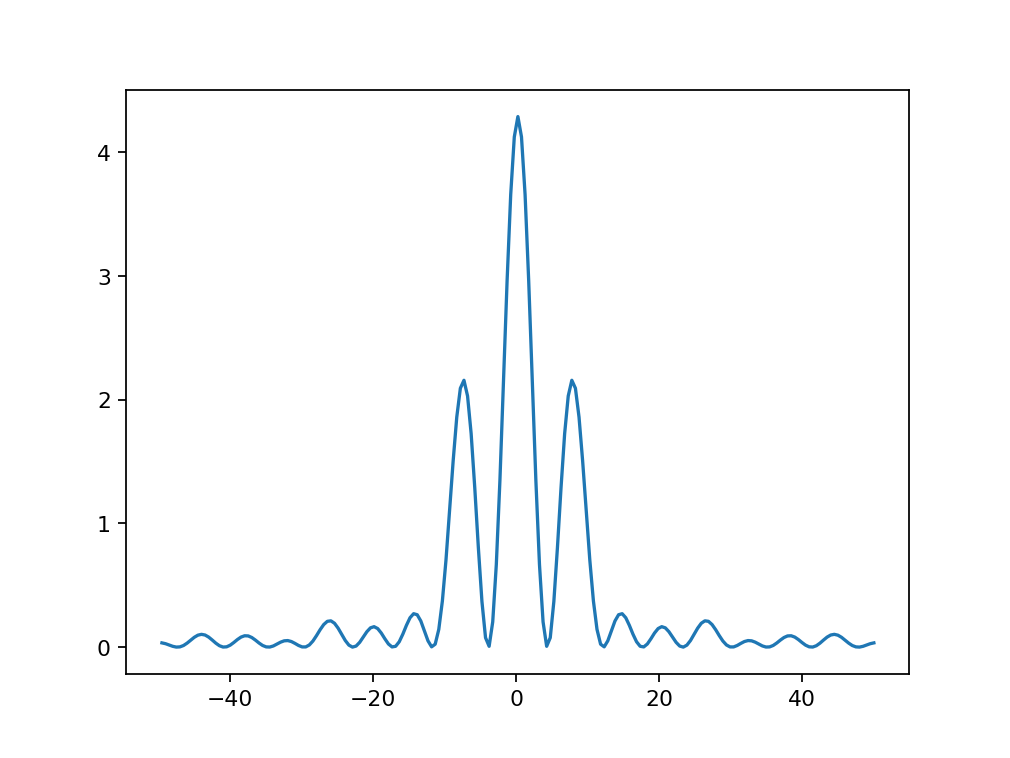

In [53]:
amplitude = 1
amplitude8 = AssignQuantity(amplitude,'micrometers')
f8 = np.sin(x/L*np.pi*8)*amplitude8
amplitude7 = AssignQuantity(amplitude,'micrometers')
f7 = np.sin(x/L*np.pi*7)*amplitude7
amplitude6 = AssignQuantity(amplitude,'micrometers')
f6 = np.sin(x/L*np.pi*6)*amplitude6
amplitude5 = AssignQuantity(amplitude,'micrometers')
f5 = np.sin(x/L*np.pi*5)*amplitude5
amplitude4 = AssignQuantity(amplitude,'micrometers')
f4 = np.sin(x/L*np.pi*4)*amplitude4
amplitude3 = AssignQuantity(amplitude,'micrometers')
f3 = np.sin(x/L*np.pi*3)*amplitude3

f = f8+f7+f6+f5+f4+f3
plt.figure()
plt.plot(x_mag,f.magnitude)
Z2 = (np.diff(f)/np.diff(x))**2
Z2_mag = Z2.magnitude
plt.figure()
plt.plot(x_mag[1:],Z2_mag)

<IPython.core.display.Javascript object>


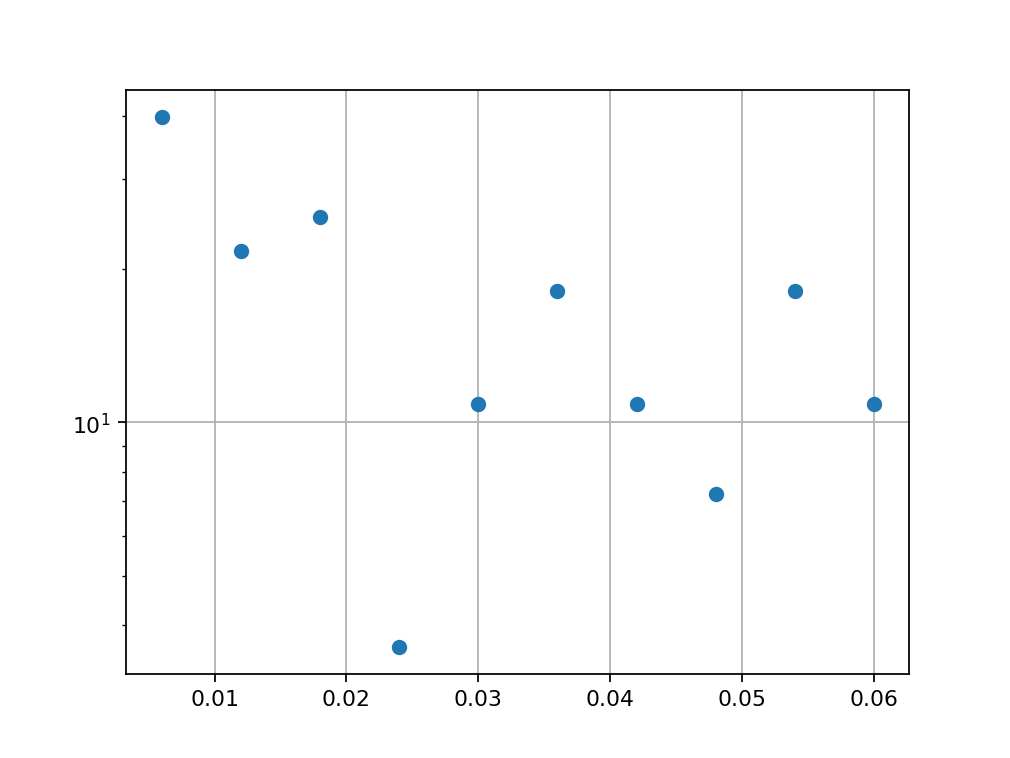

In [57]:
probs,Z2vals = np.histogram(Z2_mag,bins=10,range=(0,.06),density=True)
plt.figure()
plt.semilogy(Z2vals[1:],probs,'o')
plt.grid(True)